<a href="https://colab.research.google.com/github/Argittt/TUGAS/blob/main/PREDIKSI_OBAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membaca file CSV yang berisi data tentang data dari pasien berbeda yang menerima pengobatan untuk penyakit yang sama. Beda obatnya bisa A B C X atau Y, ke dalam sebuah DataFrame menggunakan pustaka pandas yang disimpan dalam variabel drug

In [106]:
import pandas as pd

drug = pd.read_csv('/content/sample_data/drug200.csv')

Mengetahui type data untuk setiap variabel yang digunakan

In [107]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Menampilkan lima baris teratas

In [108]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Mencetak nilai-nilai unik yang terdapat dalam kolom 'sex', 'BP', dan 'Cholesterol' dalam DataFrame drug. Dengan mencetak nilai-nilai unik dari kolom-kolom ini, kita dapat dengan cepat memeriksa dan memahami variasi nilai yang ada dalam setiap atribut.

In [109]:
# Menampilkan nilai unik dalam setiap kolom
print("Unique values in sex column:", drug['Sex'].unique())
print("Unique values in bp column:", drug['BP'].unique())
print("Unique values in cholesterol column:", drug['Cholesterol'].unique())

Unique values in sex column: ['F' 'M']
Unique values in bp column: ['HIGH' 'LOW' 'NORMAL']
Unique values in cholesterol column: ['HIGH' 'NORMAL']


Menggunakan LabelEncoder dari modul sklearn.preprocessing untuk mengubah nilai-nilai kategorikal dalam DataFrame drug menjadi nilai-nilai numerik.

In [127]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder
lb = LabelEncoder()
cols = ['Sex', 'BP', 'Cholesterol']
for col in cols:
    drug[col] = lb.fit_transform(drug[col].values)
drug.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
5,22,0,2,0,8.607,drugX
6,49,0,2,0,16.275,drugY
7,41,1,1,0,11.037,drugC
8,60,1,2,0,15.171,drugY
9,43,1,1,1,19.368,drugY


Dengan menggunakan seaborn dan matplotlib untuk membuat beberapa subplot yang menunjukkan distribusi variabel dalam DataFrame drug dengan mempertimbangkan variabel 'Sex' sebagai hue (warna).

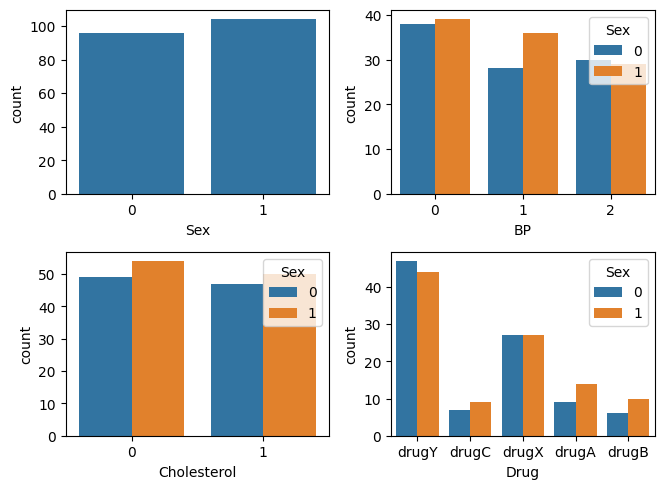

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
sns.countplot(data=drug, x='Sex')

plt.subplot(2, 3, 2)
sns.countplot(data=drug, x='BP', hue='Sex')

plt.subplot(2, 3, 4)
sns.countplot(data=drug, x='Cholesterol', hue='Sex')

plt.subplot(2, 3, 5)
sns.countplot(data=drug, x='Drug', hue='Sex')

plt.tight_layout()  # Menyesuaikan jarak antar subplot
plt.show()

Perintah untuk menghitung jumlah kemunculan setiap nilai dalam kolom 'Drug' dari DataFrame drug. ni sangat berguna untuk memahami distribusi nilai dalam kolom 'Drug' dan dapat membantu dalam analisis data dan pengambilan keputusan selanjutnya.

In [112]:
drug['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Perintah ini bertujuan untuk membagi data menjadi fitur (X) dan label (y) untuk tujuan pemodelan.

In [113]:
X = drug.drop(columns = 'Drug')
y = drug['Drug']

Perintah from sklearn.model_selection import train_test_split digunakan untuk mengimpor fungsi train_test_split dari modul model_selection di library Scikit-learn. Fungsi train_test_split ini memungkinkan kita untuk membagi dataset menjadi set pelatihan dan pengujian dengan proporsi tertentu

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 5)

Digunakan untuk menghitung jumlah kemunculan setiap nilai dalam Seri y_train

In [115]:
y_train.value_counts()

drugY    64
drugX    43
drugA    20
drugB    12
drugC    11
Name: Drug, dtype: int64

Perintah ini bertujuan untuk menangani ketidakseimbangan kelas dalam data latih menggunakan SMOTE (Synthetic Minority Over-sampling Technique), yang diimpor dari modul over_sampling di library Imbalanced-Learn (imblearn)

In [116]:
from imblearn.over_sampling import SMOTE

# Membuat objek SMOTE
sm = SMOTE(random_state=2)

# Melakukan oversampling pada data latih yang telah ditransformasi
X_train_sm, y_train_sm = sm.fit_resample(X_train_trans, y_train)

Menghitung jumlah kemunculan setiap nilai dari y_train setelah dilakukan oversampling

In [117]:
y_train_sm.value_counts()

drugY    64
drugX    64
drugA    64
drugC    64
drugB    64
Name: Drug, dtype: int64

Perintah ini berfokus pada penggunaan Grid Search untuk menemukan parameter terbaik untuk model Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm),grid_search.best_estimator_,grid_search.best_score_

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [3, None], 'max_features': [1, 3, 10],
                          'min_samples_split': [2, 3, 10]}),
 DecisionTreeClassifier(max_features=10),
 0.996875)

Perintah ini bertujuan untuk membuat dan melatih model Decision Tree dengan parameter yang telah dicari sebelumnya yaitu 3

In [119]:
model = DecisionTreeClassifier(max_features=3, min_samples_split=10).fit(X_train_sm, y_train_sm)

Membuat visualisasi dari struktur model Decision Tree yang telah dilatih.

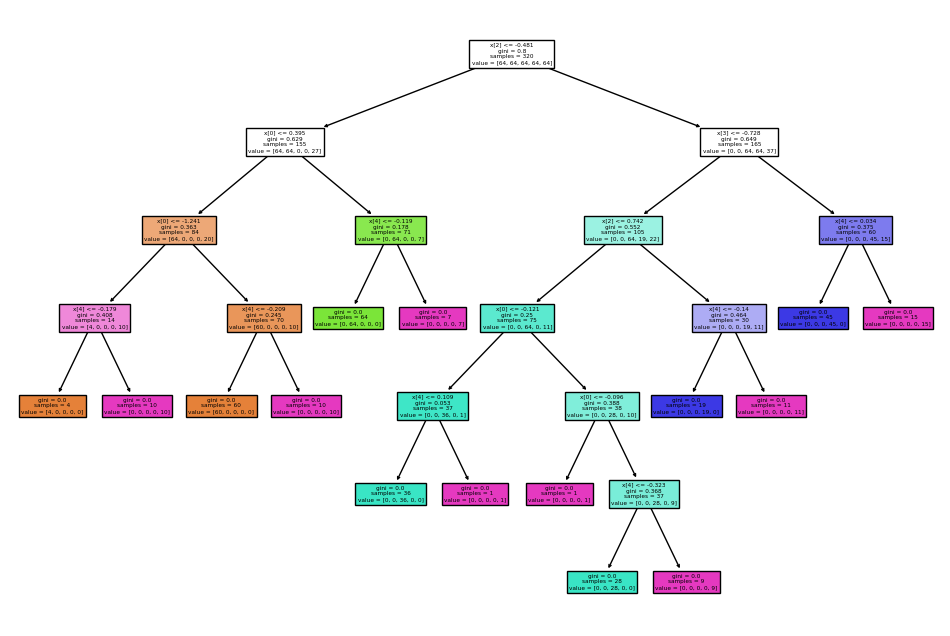

In [120]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.show()

Menghitung skor validasi silang (cross-validation score) dari model Decision Tree menggunakan modul cross_val_score dari library Scikit-learn

In [121]:
from sklearn.model_selection import cross_val_score

# Inisialisasi model sebelum penggunaan
model = DecisionTreeClassifier()

# Menghitung skor validasi silang (cross-validation score)
val_score = cross_val_score(model, X_train_sm, y_train_sm, cv=5)

# Menampilkan hasil
print(f'Minimum score of model on train data: {val_score.min()}')
print(f'Average score of model on train data: {val_score.mean()}')
print(f'Maximum score of model on train data: {val_score.max()}')

Minimum score of model on train data: 0.984375
Average score of model on train data: 0.996875
Maximum score of model on train data: 1.0


Perintah ini untuk melakukan standarisasi fitur-fitur pada data uji (X_test) menggunakan objek StandardScaler yang telah disesuaikan (fit) dengan data latih

In [122]:
ss = StandardScaler()
ss = ss.fit(X_test)
X_test_trans = ss.transform(X_test)


Bertujuan untuk melatih model Decision Tree pada data latih yang telah di-oversample (X_train_sm dan y_train_sm), dan kemudian menggunakan model yang telah dilatih untuk melakukan prediksi label pada data uji yang telah diubah skala (X_test_trans).

In [123]:
# Inisialisasi model sebelum penggunaan
model = DecisionTreeClassifier()

# Melakukan pelatihan model pada data latih
model.fit(X_train_sm, y_train_sm)

# Memprediksi label untuk data uji yang telah ditransformasi
pred = model.predict(X_test_trans)

Menghitung nilai akurasi dari model yang telah digunakan

In [124]:
from sklearn.metrics import accuracy_score
print(f'model accuracy on unseen data {accuracy_score(y_test,pred)}')

model accuracy on unseen data 0.92


In [126]:
# Meminta pengguna untuk memasukkan nilai fitur untuk prediksi
age = float(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
bp = float(input("Enter blood pressure (3 for High, 2 for Normal, 1 for Low): "))
cholesterol = float(input("Enter cholesterol level (0 for Normal, 1 for High): "))
na_to_k = float(input("Enter Na_to_K ratio: "))

# Membuat array input dari nilai-nilai yang dimasukkan pengguna
new_data_point = [[age, sex, bp, cholesterol, na_to_k]]

# Melakukan prediksi dengan model yang telah dilatih
predicted_class = model.predict(new_data_point)

# Mencetak hasil prediksi
print("Predicted class:", predicted_class[0])

Enter age: 24
Enter sex (0 for female, 1 for male): 1
Enter blood pressure: 3
Enter cholesterol level: 0
Enter Na_to_K ratio: 25
Predicted class: drugY
